# Students Performance in Exams

This data set consists of the marks secured by the students in various subjects. In this notebook, It is assumed that the data set is normally distributed.

## Datasets Description

* **`gender`:** 
    - female
    - male
* **`race.ethnicity` :** 
    - group A
    - group B
    - group C
    - group D
    - group E
* **`parental.level.of.education` :** Parent education levels of students
    - associate's degree
    - bachelor's degree
    - high school
    - master's degree 
    - some college
    - some high school
* **`lunch`:** 
    - free/reduced
    - standard
* **`test.preparation.course`:** 
    - completed
    - none
* **`math.score`** 
* **`reading.score`** 
* **`writing.score`** 

**Which features are categorical?**
- gender, race.ethnicity, parental.level.of.education, lunch, test.preparation.course

**Which features are numerical?**
- math.score, reading.score, writing.score

In [1]:
library(tidyverse) 
library(ggplot2)
library(dplyr)
library(fBasics) 
library(kableExtra)
library(funModeling)
library(plotly)
library(MASS)
library(corrplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: timeDate

Loading required package: timeSeries


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


funModeling v.1.9.4 :)
Examples and tutorials at livebook.datascienceheroes.com
 / Now in Spanish: librovivo

In [2]:
data <- read.csv("../input/students-performance-in-exams/StudentsPerformance.csv")

names_columns <- c("gender","race","parent_education","lunch","test_prep","math_score","reading_score","writing_score")
colnames(data) <- names_columns

- Data set has **1000** rows and **8** features
- Data set has not missing value

In [3]:
head(data, 10)

,gender,race,parent_education,lunch,test_prep,math_score,reading_score,writing_score
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78
7,female,group B,some college,standard,completed,88,95,92
8,male,group B,some college,free/reduced,none,40,43,39
9,male,group D,high school,free/reduced,completed,64,64,67


In [4]:
summary(data)

    gender         race               parent_education          lunch    
 female:518   group A: 89   associate's degree:222     free/reduced:355  
 male  :482   group B:190   bachelor's degree :118     standard    :645  
              group C:319   high school       :196                       
              group D:262   master's degree   : 59                       
              group E:140   some college      :226                       
                            some high school  :179                       
     test_prep     math_score     reading_score    writing_score   
 completed:358   Min.   :  0.00   Min.   : 17.00   Min.   : 10.00  
 none     :642   1st Qu.: 57.00   1st Qu.: 59.00   1st Qu.: 57.75  
                 Median : 66.00   Median : 70.00   Median : 69.00  
                 Mean   : 66.09   Mean   : 69.17   Mean   : 68.05  
                 3rd Qu.: 77.00   3rd Qu.: 79.00   3rd Qu.: 79.00  
                 Max.   :100.00   Max.   :100.00   Max.   :100.00  

In [5]:
str(data)

'data.frame':	1000 obs. of  8 variables:
 $ gender          : Factor w/ 2 levels "female","male": 1 1 1 2 2 1 1 2 2 1 ...
 $ race            : Factor w/ 5 levels "group A","group B",..: 2 3 2 1 3 2 2 2 4 2 ...
 $ parent_education: Factor w/ 6 levels "associate's degree",..: 2 5 4 1 5 1 5 5 3 3 ...
 $ lunch           : Factor w/ 2 levels "free/reduced",..: 2 2 2 1 2 2 2 1 1 1 ...
 $ test_prep       : Factor w/ 2 levels "completed","none": 2 1 2 2 2 2 1 2 1 2 ...
 $ math_score      : int  72 69 90 47 76 71 88 40 64 38 ...
 $ reading_score   : int  72 90 95 57 78 83 95 43 64 60 ...
 $ writing_score   : int  74 88 93 44 75 78 92 39 67 50 ...


In [6]:
anyNA(data)

[1] FALSE

- Mathematics exam score average of students : 66.08

- Reading exam score average of students : 69.16

- Writing exam score average of students : 68.05

In [7]:
profiling_num(data)

variable,mean,std_dev,variation_coef,p_01,p_05,p_25,p_50,p_75,p_95,p_99,skewness,kurtosis,iqr,range_98,range_80
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
math_score,66.089,15.16308,0.2294342,27.99,40.95,57.00,66,77,90.05,98.01,-0.2785166,3.267597,20.00,"[27.99, 98.01]","[47, 86]"
reading_score,69.169,14.60019,0.2110800,31.99,44.00,59.00,70,79,92.00,100.00,-0.2587157,2.926081,20.00,"[31.99, 100]","[51, 87.1]"
writing_score,68.054,15.19566,0.2232882,31.98,42.95,57.75,69,79,92.00,100.00,-0.2890096,2.960808,21.25,"[31.98, 100]","[48, 87]"


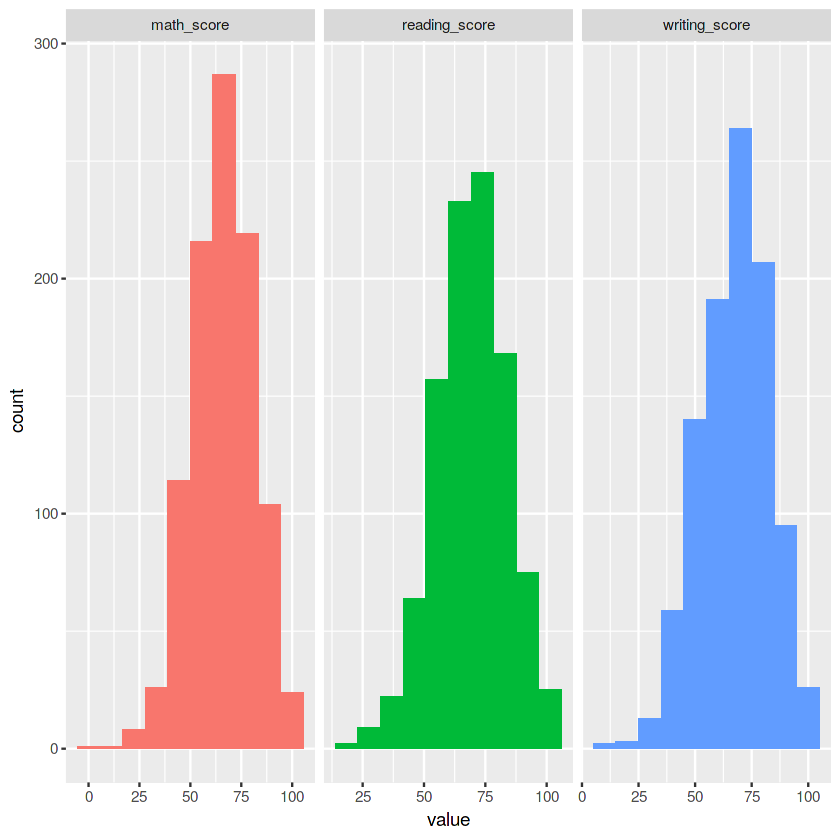

In [8]:
plot_num(data)

- While 51.8% of the students are female, 48.2% are male students.

var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
female,518,51.8,51.8
male,482,48.2,100.0


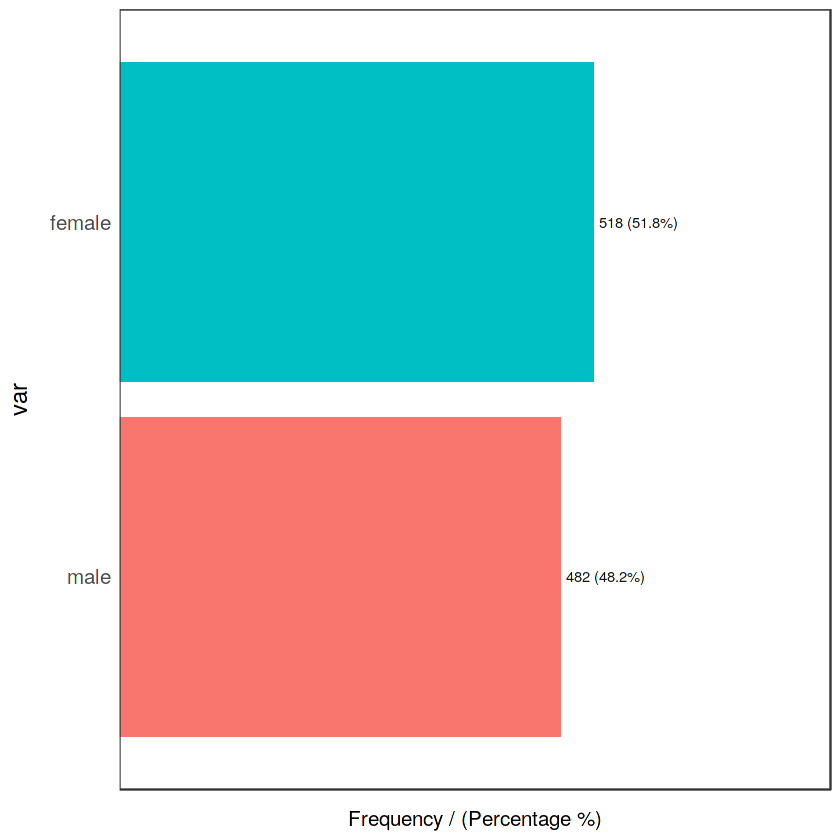

In [9]:
freq(data$gender)

- The most common race ethnicity is Group C, while the least common is Group A.

var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
group C,319,31.9,31.9
group D,262,26.2,58.1
group B,190,19.0,77.1
group E,140,14.0,91.1
group A,89,8.9,100.0


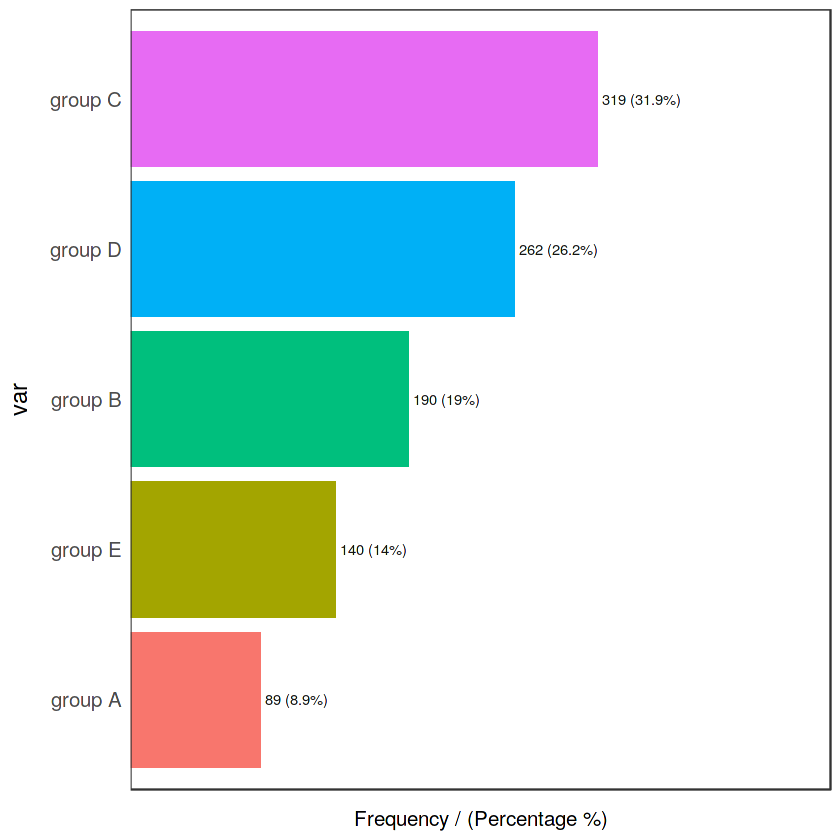

In [10]:
freq(data$race)

- The parent education level variable of the students consists of 6 categories. 

var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
some college,226,22.6,22.6
associate's degree,222,22.2,44.8
high school,196,19.6,64.4
some high school,179,17.9,82.3
bachelor's degree,118,11.8,94.1
master's degree,59,5.9,100.0


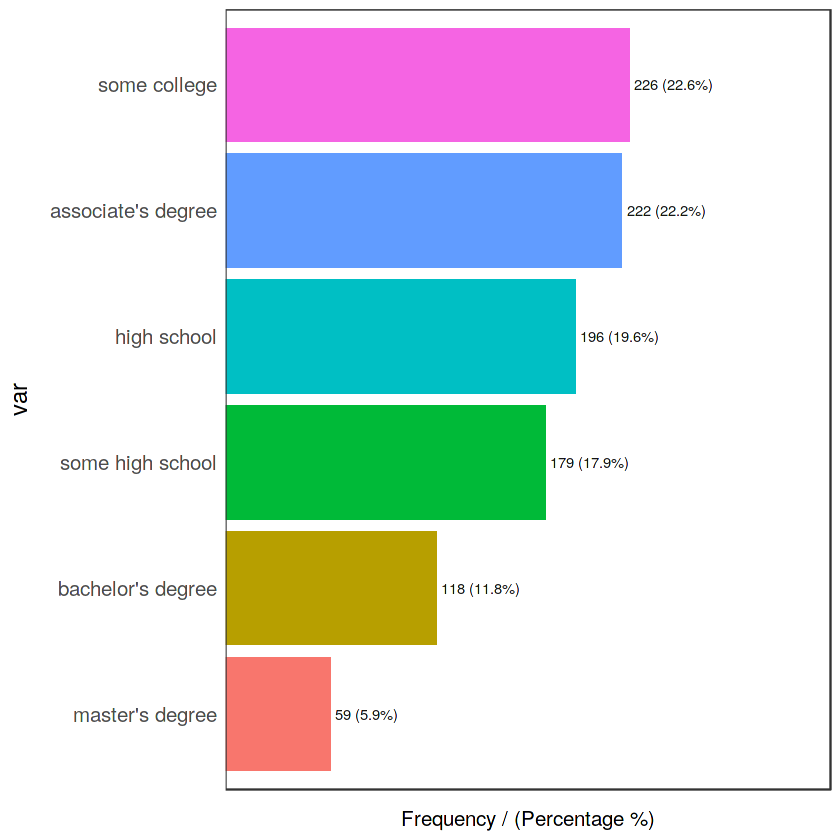

In [11]:
freq(data$parent_education)

- 64.5% of the students eat lunch at standard price and 35.5% eat free/reduced lunch

var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
standard,645,64.5,64.5
free/reduced,355,35.5,100.0


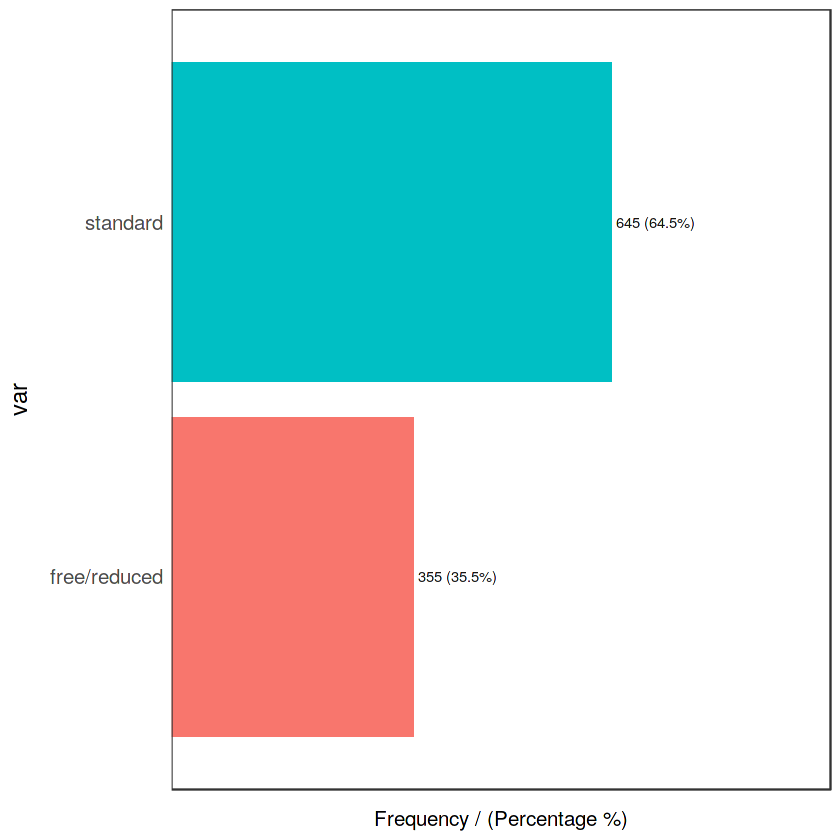

In [12]:
freq(data$lunch)

- While 642 of the students did not complete the exam preparation course, 358 student did.

var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
none,642,64.2,64.2
completed,358,35.8,100.0


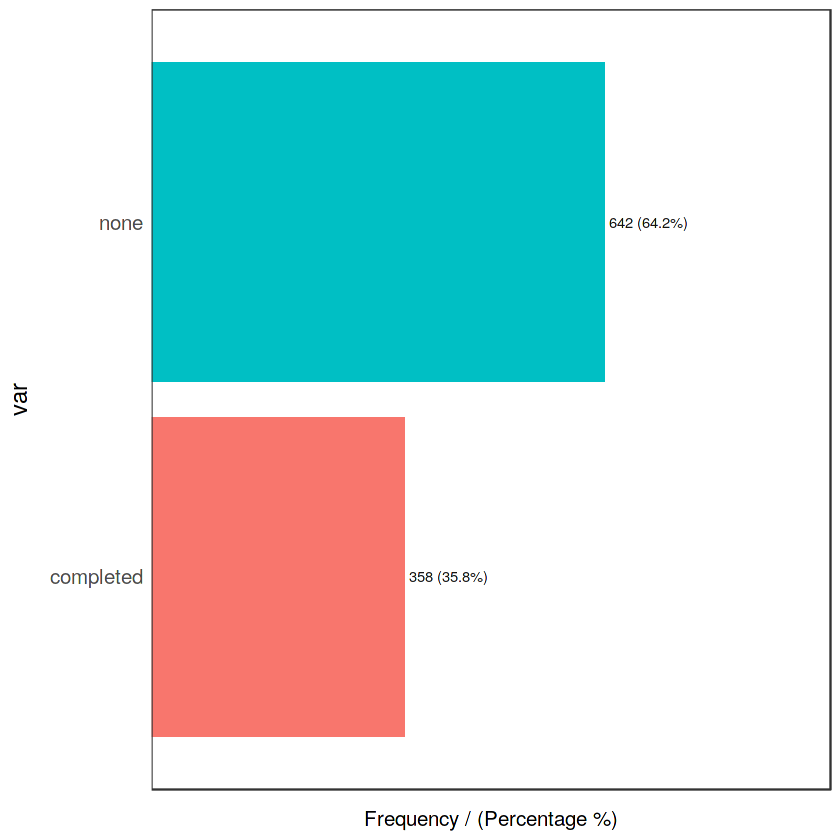

In [13]:
freq(data$test_prep)

Warning message:
“Use of `data$gender` is discouraged. Use `gender` instead.”
Warning message:
“Use of `data$race` is discouraged. Use `race` instead.”


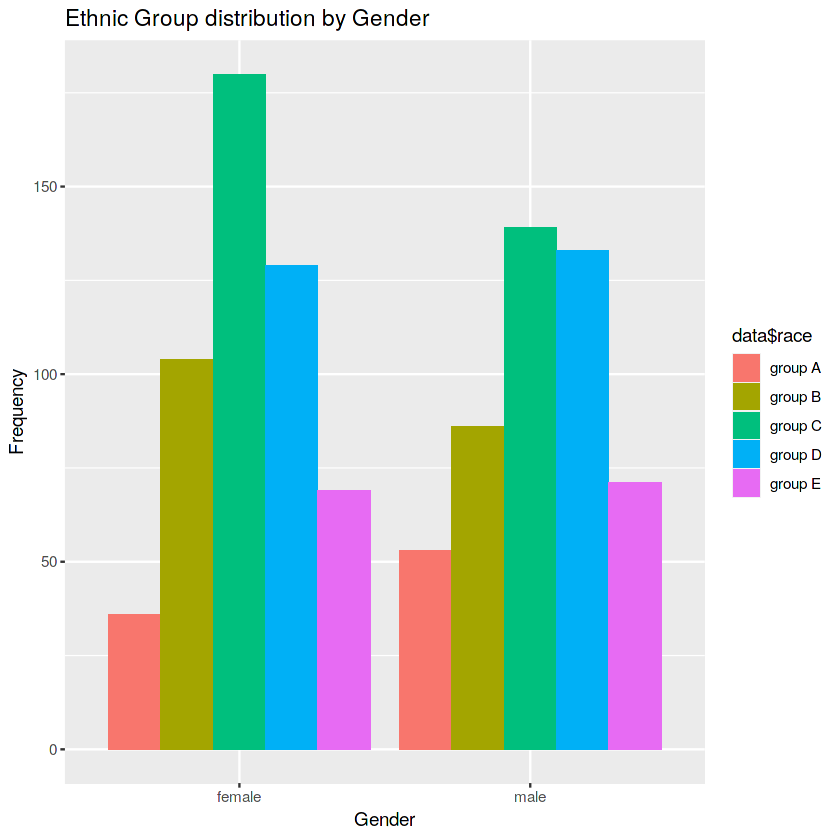

In [14]:
ggplot(data,aes(data$gender, fill=data$race))+
  geom_bar(position=position_dodge())+
  ggtitle("Ethnic Group distribution by Gender")+
  xlab("Gender")+
  ylab("Frequency")

# T-Test

In [15]:
attach(data)

## **Are there any differences between the exam scores of female and male students?**

$ H_0 $: There is no difference between the mathematics scores of male and female students.

$ H_1 $: There is a difference between the mathematics scores of male and female students.

**t=-5.398 p value < 0.05**

$H_0$ is rejected. There is a difference between gender and math test score.

In [16]:
t.test(math_score~gender, var.equal=TRUE)


	Two Sample t-test

data:  math_score by gender
t = -5.3832, df = 998, p-value = 9.12e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.952285 -3.237737
sample estimates:
mean in group female   mean in group male 
            63.63320             68.72822 


$ H_0 $: There is no difference between the reading scores of male and female students.

$ H_1 $: There is a difference between the reading scores of male and female students.

**t=7.9593 p value <0.05**

$H_0$ is rejected. There is a difference between gender and reading test score.

In [17]:
t.test(reading_score~gender, var.equal=TRUE, data=data)


	Two Sample t-test

data:  reading_score by gender
t = 7.9593, df = 998, p-value = 4.681e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 5.375946 8.894212
sample estimates:
mean in group female   mean in group male 
            72.60811             65.47303 


$ H_0 $: There is no difference between the writing scores of male and female students.

$ H_1 $: There is a difference between the writing scores of male and female students.

**t=9.9796 p value <0.05**

$H_0$ is rejected. There is a difference between gender and writing test score.

In [18]:
t.test(writing_score~gender,var.equal=TRUE )


	Two Sample t-test

data:  writing_score by gender
t = 9.9796, df = 998, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  7.35558 10.95638
sample estimates:
mean in group female   mean in group male 
            72.46718             63.31120 


# chi-square


$ H_0 $: Completing the test preparation course is not related to gender.

$ H_1 $: Completing the test preparation course is related to gender.

**p value =0.9>0.05**

$H_0$ is accepted.

In [19]:
xtab<- table(gender, test_prep)

chisq.test(xtab)


	Pearson's Chi-squared test with Yates' continuity correction

data:  xtab
X-squared = 0.015529, df = 1, p-value = 0.9008


$ H_0 $: Lunch eating status is not related to gender.

$ H_1 $: Lunch eating status is related to gender.

**p value=0.5421>0.05** 

$H_0$ is accepted.

In [20]:
xtab<- table(gender, lunch)

chisq.test(xtab)


	Pearson's Chi-squared test with Yates' continuity correction

data:  xtab
X-squared = 0.37174, df = 1, p-value = 0.5421


# Correlation

* There is a strong positive correlation between the variables.

In [21]:
num_data <- data[, c( "math_score", "reading_score", "writing_score")]
m<-cor(num_data)
m

,math_score,reading_score,writing_score
math_score,1.0000000,0.8175797,0.8026420
reading_score,0.8175797,1.0000000,0.9545981
writing_score,0.8026420,0.9545981,1.0000000


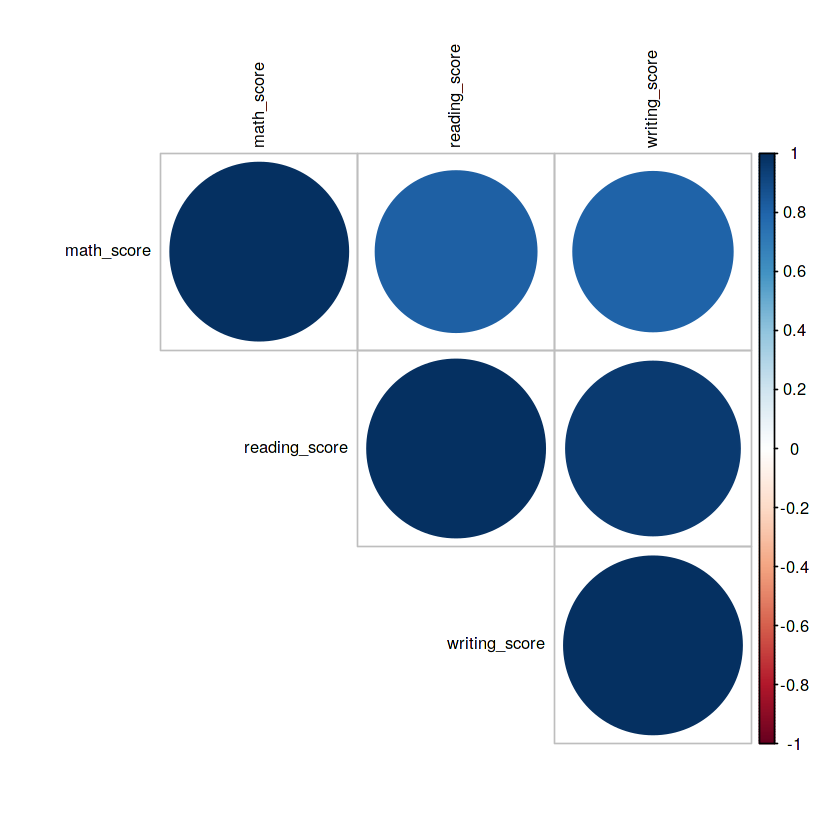

In [22]:
corrplot(m, method="circle", type='upper', tl.cex=0.8, tl.col = 'black')

# Regression

$$math.score= -5.2230+11.8614 gender+0.9483 reading$$

R-squared = 0.8122, this implies that 81.2% of the mathematics score can be explained by the variables of gender and reading test score.

In [23]:
reg1<- lm(math_score~ gender+reading_score, data=data)
summary(reg1)


Call:
lm(formula = math_score ~ gender + reading_score, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.7447  -4.3918  -0.0747   4.1590  18.1338 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -5.2230     1.1056  -4.724 2.64e-06 ***
gendermale     11.8614     0.4292  27.634  < 2e-16 ***
reading_score   0.9483     0.0147  64.523  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.577 on 997 degrees of freedom
Multiple R-squared:  0.8122,	Adjusted R-squared:  0.8119 
F-statistic:  2157 on 2 and 997 DF,  p-value: < 2.2e-16


$$ math.score=-7.1570+11.9632 gender+1.5327 course+0.9614 reading $$

R-squared = 0.8144,this implies that 81.4% of the mathematics score can be explained by the variables of gender,reading test scorea and test preparation course.

In [24]:
reg2<- lm(math_score~ gender+test_prep+reading_score, data=data)
summary(reg2)


Call:
lm(formula = math_score ~ gender + test_prep + reading_score, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.1746  -4.2620  -0.1302   4.1333  17.5549 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -7.1570     1.2351  -5.795 9.19e-09 ***
gendermale     11.9632     0.4279  27.955  < 2e-16 ***
test_prepnone   1.5327     0.4457   3.438 0.000609 ***
reading_score   0.9614     0.0151  63.661  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.541 on 996 degrees of freedom
Multiple R-squared:  0.8144,	Adjusted R-squared:  0.8139 
F-statistic:  1457 on 3 and 996 DF,  p-value: < 2.2e-16


$$ writing.score=78.8971-9.2137 gender-9.9722 course $$

R-squared = 0.1898, this implies that 19% of the writing score can be explained by the variables of gender and test preparation course.

In [25]:
reg3<-lm(writing_score~ gender+test_prep, data=data)
summary(reg3)


Call:
lm(formula = writing_score ~ gender + test_prep, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-58.925  -8.711   0.317   9.296  32.289 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    78.8971     0.8372   94.23   <2e-16 ***
gendermale     -9.2137     0.8665  -10.63   <2e-16 ***
test_prepnone  -9.9722     0.9031  -11.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.69 on 997 degrees of freedom
Multiple R-squared:  0.1898,	Adjusted R-squared:  0.1882 
F-statistic: 116.8 on 2 and 997 DF,  p-value: < 2.2e-16


In [26]:
detach(data)

**Thank you for reading. If you like, please upvote notebook :)**